# Latar Belakang
Transjakarta adalah andalan transportasi pekerja di Jakarta, namun sering menghadapi masalah seperti keterlambatan dan kepadatan yang mengurangi produktivitas. Optimisasi layanan melalui perbaikan jadwal, peningkatan jumlah armada, dan pengelolaan antrean yang lebih baik.


# Rumusan Masalah
1. Kelompok usia mana yang paling banyak menggunakan Transjakarta untuk keperluan bekerja?
2. Apa saja rute terpadat Transjakarta?
3. Pada jam padat mana saja pengguna Transjakarta mengalami kepadatan yang signifikan? 

# DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Isi data :
1.	transID: Unique transaction id for every transaction
2.	payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
3.	payCardBank: Customers card bank issuer name
4.	payCardName: Customers name that is embedded in the card.
5.	payCardSex: Customers sex that is embedded in the card
6.	payCardBirthDate: Customers birth year
7.	corridorID: Corridor ID / Route ID as key for route grouping.
8.	corridorName: Corridor Name / Route Name contains Start and Finish for each route.
9.	direction: 0 for Go, 1 for Back. Direction of the route.
10.	tapInStops: Tap In (entrance) Stops ID for identifying stops name
11.	tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
12.	tapInStopsLat: Latitude of Tap In Stops
13.	tapInStopsLon: Longitude of Tap In Stops
14.	stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15.	tapInTime: Time of tap in. Date and time
16.	tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
17.	tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
18.	tapOutStopsLat: Latitude of Tap Out Stops
19.	tapOutStopsLon: Longitude of Tap Out Stops
20.	stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21.	tapOutTime: Time of tap out. Date and time
22.	payAmount: The number of what customers pay. Some are free. Some not.

In [2]:
df=pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning


In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [4]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

#### Memisahkan Tanggal dan Waktu `tapInTime` dan `tapOutTime`


In [5]:
# Asumsi data sudah ada di DataFrame df dan 'tapInTime' dalam format string
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

# Memisahkan tanggal dan waktu
df['tapInDate'] = df['tapInTime'].dt.date  # Mendapatkan tanggal
df['tapInHour'] = df['tapInTime'].dt.time  # Mendapatkan waktu lengkap (jam, menit, detik)

# Menampilkan hasil
print(df[['tapInTime', 'tapInDate', 'tapInHour']].head())

            tapInTime   tapInDate tapInHour
0 2023-04-03 05:21:44  2023-04-03  05:21:44
1 2023-04-03 05:42:44  2023-04-03  05:42:44
2 2023-04-03 05:59:06  2023-04-03  05:59:06
3 2023-04-03 05:44:51  2023-04-03  05:44:51
4 2023-04-03 06:17:35  2023-04-03  06:17:35


In [6]:
# Asumsi data sudah ada di DataFrame df dan 'tapInTime' dalam format string
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

# Memisahkan tanggal dan waktu
df['tapOutDate'] = df['tapOutTime'].dt.date  # Mendapatkan tanggal
df['tapOutHour'] = df['tapOutTime'].dt.time  # Mendapatkan waktu lengkap (jam, menit, detik)

# Menampilkan hasil
print(df[['tapOutTime', 'tapOutDate', 'tapOutHour']].head())

           tapOutTime  tapOutDate tapOutHour
0 2023-04-03 06:00:53  2023-04-03   06:00:53
1 2023-04-03 06:40:01  2023-04-03   06:40:01
2 2023-04-03 06:50:55  2023-04-03   06:50:55
3 2023-04-03 06:28:16  2023-04-03   06:28:16
4 2023-04-03 06:57:03  2023-04-03   06:57:03


### Missing Value

In [7]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
tapInDate           0.000000
tapInHour           0.000000
tapOutDate          3.546174
tapOutHour          3.546174
dtype: float64

In [8]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
tapInDate              0
tapInHour              0
tapOutDate          1344
tapOutHour          1344
dtype: int64

<Axes: >

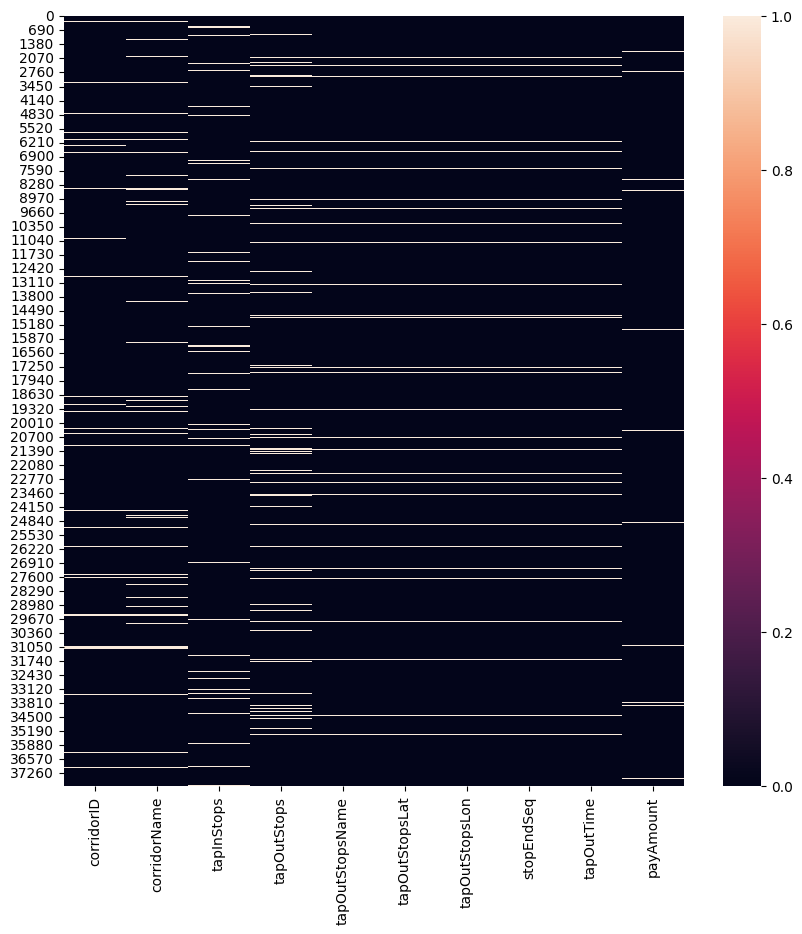

In [9]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq', 'tapOutTime', 'payAmount']].isna())

Missing value pada `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime` memiliki pesebaran yang sama dan dengan `tapOutStops` ada beberapa missing value yang berkaitan.

In [10]:
# Filter data di mana corridorID adalah NaN
missing_corridor = df[df['corridorID'].isnull()]

# Cek kolom mana aja yang missing di data ini
missing_columns_summary = missing_corridor.isnull().sum()

# Filter kolom yang memiliki missing value
missing_columns = missing_columns_summary[missing_columns_summary > 0]

print("Kolom yang memiliki missing value di data yang corridorID-nya NaN:")
print(missing_columns)

Kolom yang memiliki missing value di data yang corridorID-nya NaN:
corridorID         1257
corridorName       1125
tapInStops           38
tapOutStops          86
tapOutStopsName      52
tapOutStopsLat       52
tapOutStopsLon       52
stopEndSeq           52
tapOutTime           52
payAmount            31
tapOutDate           52
tapOutHour           52
dtype: int64


### Handling Missing Value

Mengisi `tapInStops` berdasarkan `tapInStopsName` dan `tapOutStops`berdasarkan `tapOutStopsName`

In [11]:
# Buat mapping dari tapInStopsName ke tapInStops
mapping_tapIn = df.dropna(subset=['tapInStops', 'tapInStopsName']).set_index('tapInStopsName')['tapInStops'].to_dict()

# Buat mapping dari tapOutStopsName ke tapOutStops
mapping_tapOut = df.dropna(subset=['tapOutStops', 'tapOutStopsName']).set_index('tapOutStopsName')['tapOutStops'].to_dict()


In [12]:
# Isi missing value di tapInStops
df['tapInStops'] = df['tapInStops'].fillna(df['tapInStopsName'].map(mapping_tapIn))

# Isi missing value di tapOutStops
df['tapOutStops'] = df['tapOutStops'].fillna(df['tapOutStopsName'].map(mapping_tapOut))


In [13]:
# Hitung modus per corridorID untuk kolom tapInStops, tapOutStops, dan tapOutStopsName
mode_tapInStops = df.groupby('corridorID')['tapInStops'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
mode_tapOutStops = df.groupby('corridorID')['tapOutStops'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
mode_tapOutStopsName = df.groupby('corridorID')['tapOutStopsName'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
mode_corridorName = df.groupby('corridorID')['corridorName'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Imputasi missing value berdasarkan modus
df['tapInStops'] = df.apply(lambda row: mode_tapInStops[row['corridorID']] if pd.isnull(row['tapInStops']) and row['corridorID'] in mode_tapInStops else row['tapInStops'], axis=1)
df['tapOutStops'] = df.apply(lambda row: mode_tapOutStops[row['corridorID']] if pd.isnull(row['tapOutStops']) and row['corridorID'] in mode_tapOutStops else row['tapOutStops'], axis=1)
df['tapOutStopsName'] = df.apply(lambda row: mode_tapOutStopsName[row['corridorID']] if pd.isnull(row['tapOutStopsName']) and row['corridorID'] in mode_tapOutStopsName else row['tapOutStopsName'], axis=1)
df['corridorName'] = df.apply(lambda row: mode_corridorName[row['corridorID']] if pd.isnull(row['corridorName']) and row['corridorID'] in mode_corridorName else row['corridorName'], axis=1)


Mengisi `CorridorID` berdasarkan `tapInStopsName` dan `tapOutStopsName`

In [14]:
# Buat mapping berdasarkan kombinasi tapInStopsName dan tapOutStopsName
mapping_corridor = df.dropna(subset=['corridorID', 'tapInStopsName', 'tapOutStopsName']) \
                      .set_index(['tapInStopsName', 'tapOutStopsName'])['corridorID'].to_dict()

# Isi missing value di corridorID
df['corridorID'] = df.apply(
    lambda row: mapping_corridor.get((row['tapInStopsName'], row['tapOutStopsName']), row['corridorID']),
    axis=1
)

Mengisi `coridorName` berdasarkan `coridorID`

In [15]:
# Buat mapping dari corridorID ke corridorName
mapping_corridor_name = df.dropna(subset=['corridorID', 'corridorName']).set_index('corridorID')['corridorName'].to_dict()

# Isi missing value di corridorName
df['corridorName'] = df['corridorName'].fillna(df['corridorID'].map(mapping_corridor_name))


In [16]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID           133
corridorName         120
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops           52
tapOutStopsName       52
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
tapInDate              0
tapInHour              0
tapOutDate          1344
tapOutHour          1344
dtype: int64

##### Handle Missing Value `tapOutDate` berdasarkan `tapInDate`

In [17]:
df[['tapInDate','tapOutDate']].isna().sum()

tapInDate        0
tapOutDate    1344
dtype: int64

In [18]:
# Mengecek apakah semua tanggal di tapInDate ada di tapOutDate
tapIn_tapOut = df['tapInDate'].isin(df['tapOutDate']).all()

# Mengecek apakah semua tanggal di tapOutDate ada di tapInDate
tapOut_tapIn = df['tapOutDate'].isin(df['tapInDate']).all()

print("Data pada TapInDate ada pada TapOutDate :", tapIn_tapOut)
print("Data pada TapOutDate ada pada TapInDate :", tapOut_tapIn)



Data pada TapInDate ada pada TapOutDate : True
Data pada TapOutDate ada pada TapInDate : False


Dapat dilihat data yang ada pada `tapInDate` memiliki data yang ada pada `tapOutDate`, namun tidak keseluruhan data pada `tapOutDate` memiliki data yang dimiliki `tapInDate` karena adanya missing value.

Sehingga dapat dilakukan pengisian missing value pada `tapOutDate` menggunakan data yang ada pada `tapOutDate`.

In [19]:
# Mengisi missing value pada tapOutDate dengan nilai dari tapInDate jika tapOutDate kosong
df['tapOutDate'].fillna(df['tapInDate'], inplace=True)

# Menampilkan jumlah missing value setelah pengisian
print("Jumlah missing value setelah pengisian:")
print(df[['tapInDate', 'tapOutDate']].isna().sum())


Jumlah missing value setelah pengisian:
tapInDate     0
tapOutDate    0
dtype: int64


#### Melakukand drop pada `CorridorID` yang memiliki missing value

In [20]:
df = df.dropna(subset=['corridorID'])

#### Mengisi missing value pada `tapOutStopsLat` dan `tapOutStopsLon` berdasarkan `tapOutStopName`

In [21]:
# Buat dictionary untuk mapping koordinat yang gak missing dari tapOutStopsName
lat_mapping = df.dropna(subset=['tapOutStopsLat']).set_index('tapOutStopsName')['tapOutStopsLat'].to_dict()
lon_mapping = df.dropna(subset=['tapOutStopsLon']).set_index('tapOutStopsName')['tapOutStopsLon'].to_dict()

# Imputasi nilai missing untuk tapOutStopsLat dan tapOutStopsLon
df['tapOutStopsLat'] = df.apply(lambda row: lat_mapping[row['tapOutStopsName']] if pd.isnull(row['tapOutStopsLat']) and row['tapOutStopsName'] in lat_mapping else row['tapOutStopsLat'], axis=1)
df['tapOutStopsLon'] = df.apply(lambda row: lon_mapping[row['tapOutStopsName']] if pd.isnull(row['tapOutStopsLon']) and row['tapOutStopsName'] in lon_mapping else row['tapOutStopsLon'], axis=1)


#### Mengisi missing value pada `stopEndSeq`

In [22]:
mode_stopEndSeq = df['stopEndSeq'].mode()[0]
df['stopEndSeq'].fillna(mode_stopEndSeq, inplace=True)


#### Mengisi missing value pada `tapOutTime`

In [ ]:
average_duration = df['tapOutTime'].mean() - df['tapInTime'].mean() 
df['tapOutTime'] = df.apply(lambda row: row['tapInTime'] + average_duration if pd.isnull(row['tapOutTime']) else row['tapOutTime'], axis=1)


#### Mengisi missing value pada `payAmount`

In [24]:
median_payAmount = df['payAmount'].median()
df['payAmount'].fillna(median_payAmount, inplace=True)


#### Mengisi missing value pada `tapOutHour`

In [25]:
df['tapOutHour'] = df['tapOutTime'].dt.hour  # Pastikan tapOutTime dalam format datetime



In [26]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
tapInDate           0
tapInHour           0
tapOutDate          0
tapOutHour          0
dtype: int64

# Data yang Sudah Bersih

In [27]:
listItem = []
for col in df.columns:
    unique_count = df[col].nunique()
    # Jika jumlah unique lebih dari 1, ambil 2 sampel, jika tidak, ambil semua unique values
    if unique_count > 1:
        sample_values = list(df[col].drop_duplicates().sample(2).values)
    else:
        sample_values = list(df[col].drop_duplicates().values)
    
    listItem.append([col, df[col].dtype, df[col].isna().sum(), unique_count, sample_values])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                      data=listItem)

print(df.shape)
dfDesc


(37767, 26)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,37767,"[NFPB029T5R39HI, JQLX852C5T08IC]"
1,payCardID,int64,0,1995,"[213192524816871, 4259205586349126267]"
2,payCardBank,object,0,6,"[bni, brizzi]"
3,payCardName,object,0,1988,"[Rahmi Hartati, Najib Wijaya]"
4,payCardSex,object,0,2,"[F, M]"
5,payCardBirthDate,int64,0,67,"[1950, 1998]"
6,corridorID,object,0,221,"[5N, 6Q]"
7,corridorName,object,0,216,"[Kebayoran Lama - Tanah Abang, Puri Beta - Kuningan (Express)]"
8,direction,float64,0,2,"[1.0, 0.0]"
9,tapInStops,object,0,2534,"[B02577P, B03755P]"


# Visualisasi Data

### Profil Demografi Pengguna

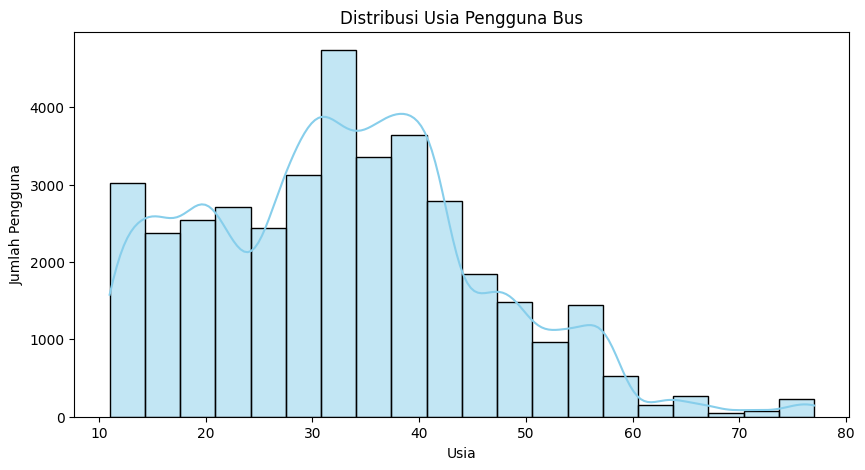

In [28]:
# Konversi kolom `tapInDate` ke datetime jika perlu
df['tapInDate'] = pd.to_datetime(df['tapInDate'])

# Tambahkan kolom umur
df['age'] = 2023 - df['payCardBirthDate']


# Distribusi Usia Pengguna
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=20, kde=True, color="skyblue")
plt.title('Distribusi Usia Pengguna Bus')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pengguna')
plt.show()


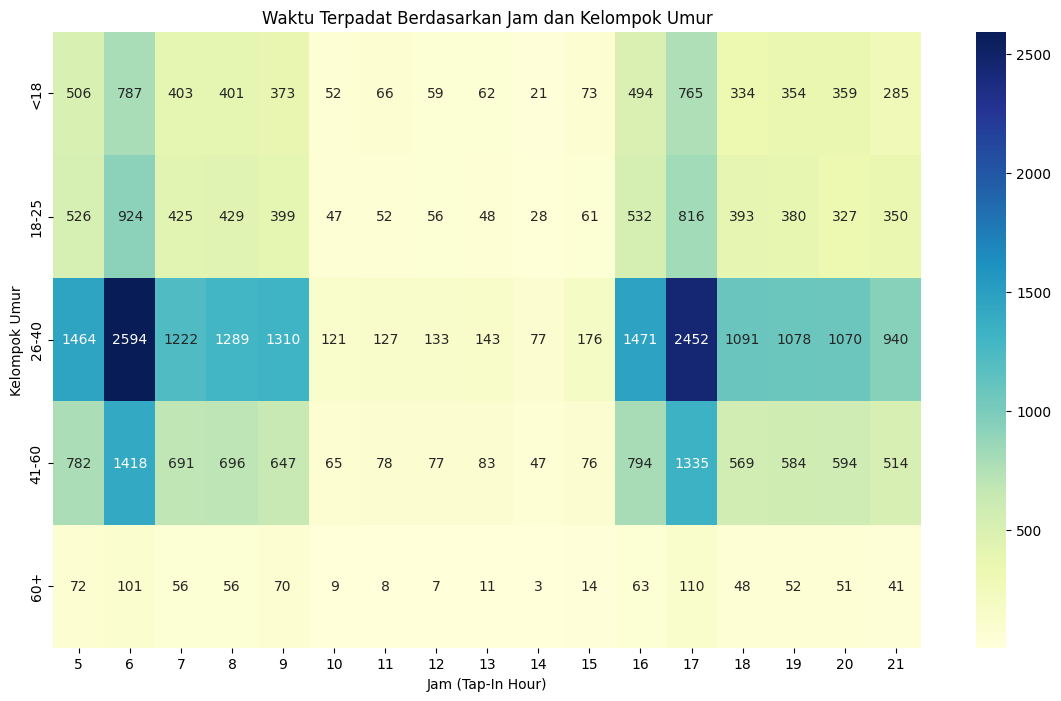

In [33]:
# Define age groups
bins = [0, 17, 25, 40, 60, 100]  # Age intervals
labels = ['<18', '18-25', '26-40', '41-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Filter the data for specific hours (e.g., 5 to 21 only)
filtered_df = df[df['tapInHour'].between(5, 21)]

# Analyze peak hours by age group for selected tap-in times
peak_hours = filtered_df.groupby(['age_group', 'tapInHour']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(14, 8))
sns.heatmap(peak_hours, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Waktu Terpadat Berdasarkan Jam dan Kelompok Umur")
plt.xlabel("Jam (Tap-In Hour)")
plt.ylabel("Kelompok Umur")
plt.show()


Grafik di atas menunjukkan waktu terpadat berdasarkan jam dan kelompok umur untuk waktu masuk (tap-in). Insight utama yang dapat diambil:

- **Remaja (<18 tahun)** : Cenderung memiliki puncak kepadatan di jam 6-8 pagi, kemungkinan bertepatan dengan waktu berangkat sekolah.
- Dewasa Muda (18-25 tahun): Waktu terpadat terjadi pada jam 6-9 pagi dan sore hari sekitar jam 16-18, kemungkinan besar terkait dengan waktu kerja atau kuliah.
- **Dewasa Menengah (26-40 tahun)** : Puncak kepadatan terlihat pada jam 6-9 pagi dan sore hari sekitar jam 16-19, sesuai dengan pola perjalanan karyawan.
- **Dewasa Tua (41-60 tahun)** : Waktu sibuk mereka mengikuti pola pekerja umumnya di pagi dan sore hari, tetapi lebih merata dibandingkan kelompok usia lainnya.
- **Lansia (60+ tahun)** : Puncak aktivitas tidak terlalu tinggi, dengan aktivitas yang lebih merata sepanjang hari.

### Analisis Rute & Kepadatan

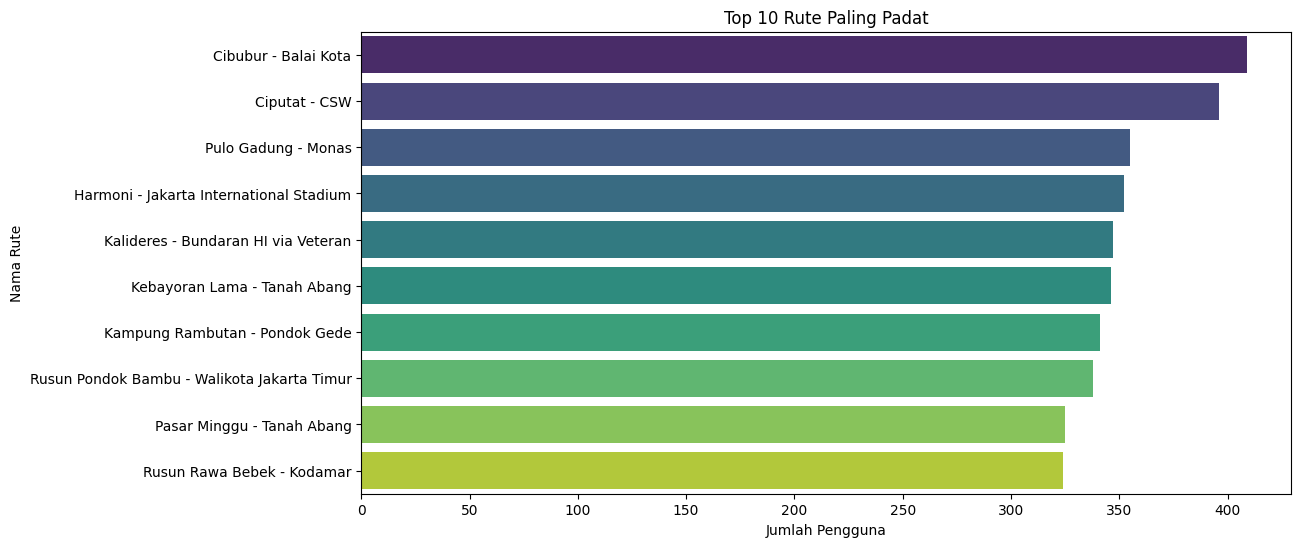

In [36]:
# Rute Paling Populer
top_corridors = df['corridorName'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_corridors.index, x=top_corridors.values, palette="viridis")
plt.title('Top 10 Rute Paling Padat')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Nama Rute')
plt.show()



Berikut adalah beberapa insight yang dapat diperoleh:

- **Rute Cibubur - Balai Kota** merupakan rute dengan jumlah pengguna tertinggi, menandakan tingginya permintaan perjalanan di jalur ini. Hal ini kemungkinan menunjukkan arus komuter yang signifikan antara kedua lokasi tersebut, yang bisa jadi karena kebutuhan kerja atau aktivitas harian lainnya.

- **Rute seperti Ciputat - CSW dan Pulo Gadung - Monas** juga memiliki jumlah pengguna yang tinggi, yang mengindikasikan bahwa rute ini melayani area utama dengan permintaan penumpang yang besar. Rute-rute ini mungkin menghubungkan area permukiman dengan pusat bisnis atau administrasi.


- Beberapa rute, seperti **Harmoni - Jakarta International Stadium dan Kebayoran Lama - Tanah Abang**, menghubungkan lokasi-lokasi utama di dalam kota, yang mungkin melayani baik penduduk lokal maupun pengunjung.


### Jam Padat

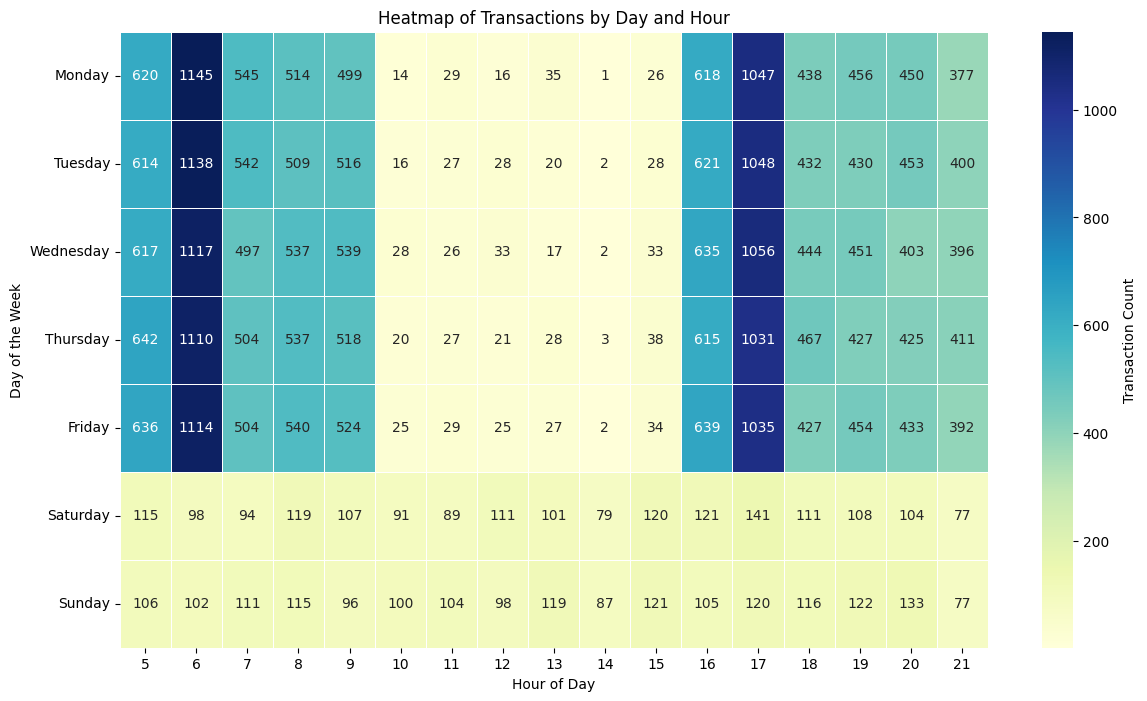

In [31]:
# Konversi kolom 'tapInTime' ke datetime dan pisahkan menjadi tanggal dan waktu
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapInDate'] = df['tapInTime'].dt.date
df['tapInHour'] = df['tapInTime'].dt.hour  # Ekstrak hanya jam untuk analisis kepadatan per jam
df['day_of_week'] = df['tapInTime'].dt.day_name()  # Mendapatkan nama hari

# Menghitung jumlah transaksi berdasarkan hari dan jam
hourly_data = df.groupby(['day_of_week', 'tapInHour']).size().reset_index(name='transaction_count')

# Membuat pivot table untuk heatmap
hourly_pivot = hourly_data.pivot(index='day_of_week', columns='tapInHour', values='transaction_count')

# Mengatur urutan hari untuk tampilan heatmap
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_pivot = hourly_pivot.reindex(days_order)

# Membuat heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(hourly_pivot, cmap='YlGnBu', annot=True, fmt="d", linewidths=.5, cbar_kws={'label': 'Transaction Count'})
plt.title("Heatmap of Transactions by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of the Week")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

- **Jam Sibuk di Hari Kerja** : Transaksi tertinggi terjadi pada hari kerja, khususnya antara jam 5 pagi hingga 10 pagi dan jam 4 sore hingga 6 sore. Hal ini mungkin mencerminkan lonjakan aktivitas transaksi pada jam-jam commuting, di mana orang-orang berangkat dan pulang kerja.

- **Tengah Hari** : Pada hari kerja, jumlah transaksi menurun signifikan di tengah hari (antara jam 12 siang hingga 2 siang). Ini bisa menunjukkan waktu istirahat atau waktu makan siang, ketika aktivitas transaksi berkurang.

- **Akhir Pekan** : Transaksi pada hari Sabtu dan Minggu lebih rendah dibandingkan dengan hari kerja, dengan aktivitas yang lebih merata sepanjang hari. Ini mungkin mencerminkan kebiasaan yang lebih santai di akhir pekan, di mana orang tidak terikat oleh jadwal kerja atau kegiatan rutin lainnya.

- **Sore Hari Akhir Pekan** : Meskipun jumlahnya masih lebih rendah dibandingkan hari kerja, terdapat sedikit peningkatan transaksi pada sore hari di akhir pekan, khususnya antara jam 4 hingga 6 sore. Hal ini bisa jadi karena aktivitas rekreasi atau belanja yang meningkat di sore hari pada akhir pekan.

- **Konsistensi Hari Kerja** : Dari Senin hingga Jumat, pola transaksi cenderung serupa, menunjukkan pola aktivitas harian yang stabil selama hari kerja.

### Menyimpan `df_cleaned`

In [32]:
# Menyimpan df_cleaned ke dalam file CSV
df.to_csv('df_cleaned.csv', index=False)


In [35]:
# Misalkan df_cleaned adalah DataFrame yang ingin disimpan
df.to_excel('df_cleaned.xlsx', index=False)